# Αναγνώριση της Αμερικάνικης Νοηματικής Γλώσσας χρησιμοποιώντας 27 κλάσεις

## Εισαγωγή

Μετά από πολλές συνεντεύξεις, έγινε κατανοητό ότι άτομα με προβλήματα ομιλίας που χρησιμοποιούν την νοηματική γλώσσα έχουν δυσκολία στην επικοινωνία με άλλα άτομα που δεν την γνωρίζουν. Λόγω των προβλημάτων επικοινωνίας, η αίσθηση της ανεξαρτησίας των ατόμων με προβλήματα ομιλίας θα μπορούσε να καταστραφεί με αποτέλεσμα να συναναστρέφονται λιγότερο με την κοινωνία. Βέβαια, λόγω της ανάπτυξης της τεχνολογίας, μπορούν να μειωθούν τα προβλήματα επικοινωνίας των ατόμων αυτών μέσω του συγκεκριμένου συνόλου δεδομένων (dataset) από το συγκεκριμένο paper. Το σύνολο δεδομένων δημιουργήθηκε με επεξεργασία της Αμερικανικής Νοηματικής Γλώσσας βασιζόμενη σε φωτογραφίες που συλλέχθηκαν από 173 εθελοντές, δημοσιευμένες ως «27 Class Sign Language Dataset» στην ιστοσελίδα Kaggle Datasets.

## Πληροφορίες για το dataset

Το συγκεκριμένο dataset έχει 27 κλάσεις που περιλαμβάνει:

* Επιλεγμένους αριθμούς, συγκεκριμένα τους 0, 1, 2, 3, 4, 5, 6, 7, 8 και 9.
* Επιλεγμένα γράμματα, όπως A, B, C, D και E.
* Επιλεγμένες εκφρασεις που είναι οι  Hello, Yes, No, Good, Bye, Good morning, Whats up, Pardon, Project, Little bit και Please.
* Η κλάση NULL συμπεριλήφθηκε ως η 27η τάξη στο σύνολο δεδομένων. Η κλάση NULL περιέχει τις 314 τυχαία τραβηγμένες φωτογραφίες στα περιβάλλοντα όπου βρίσκονταν τα δεδομένα       συγκεντρωμένα που ΔΕΝ απεικονίζονται χειρονομίες στη νοηματική γλώσσα. Αυτό έχει ως σκοπό να δοθεί η δυνατότητα στους χρήστες δεδομένων να ελέγχουν ή/και να βελτιώνουν τα έργα τους.

Εικόνες από αυτές τις επιλεγμένες κλάσεις εμφανίστηκαν σε 173 εθελοντές και τους ζητήθηκε να κάνουν την γλωσσική χειρονομία που απεικονίζοταν στην εικόνα, με το δεξί τους χέρι. Συγκεκριμένα:

* Οι χειρονομίες τραβήχτηκαν με κάμερα 3024x3024 pixel frame size και σε χρωματικό χώρο RGB. 
* Συνολικά λήφθηκαν 130 φωτογραφίες από το καθένα ατομικά, 5 από κάθε κλάση. 
* Όλα τα πλάνα έχουν διαφορετικές γωνίες με μικρές αλλαγές. 
* Οι χειρονομίες της νοηματικής γλώσσας τοποθετήθηκαν περίπου στο μέσο του πλαισίου. 
* Οι φωτογραφίες τραβήχτηκαν σε διαφορετικά μέρη για να προσφέρουν ποικιλομορφία στο φόντο και στο φως. 
* Το μέγεθος των φωτογραφιών που συλλέχθηκαν άλλαξαν στα 128x128 pixel frame size για να ελαχιστοποιηθεί το μέγεθος των δεδομένων χωρίς να επηρεαστεί η αναγνωσιμότητα της
χειρονομίας στο frame και να γίνει αποφυγή της κοινής χρήσης προσωπικών δεδομένων, όπως το χέρι και το δακτυλικό αποτύπωμα. 
* Οι integers τιμές των pixel στο εύρος [0, 255] κανονικοποιήθηκαν στα 32-bit floats στο εύρος [0, 1].
* Οι επεξεργασμένες εικόνες αποθηκεύτηκαν σε έναν 4-διάστατο NumPy tensor με όνομα «X» που έχει την μορφή (πλήθος εικόνων, ύψος εικόνας, πλάτος εικόνας, κανάλια RGB).
* Τα labels των εικόνων αποθηκεύτηκαν σε έναν 2-διάστατο NumPy tensor με όνομα «Y» που έχει την μορφή (πλήθος εικόνων, 1), αντιστοιχώντας μια ετικέτα σε κάθε εικόνα.
* Το συνολικό πλήθος των εικόνων είναι 22801.


## Φόρτωση απαραίτητων πακέτων

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras 
import tensorflow as tf
from tensorflow import keras
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

## Διαχείριση Δεδομένων

### Φόρτωση του dataset

Αρχικά γίνεται η φόρτωση των δεδομένων. Στην μεταβλητή image_data φορτώνονται οι εικόνες ενώ στην μεταβλητή label_data φορτώνονται τα labels των εικόνων.

In [4]:
image_data = np.load('E:\\archive\\X.npy')
label_data = np.load('E:\\archive\\Y.npy')

### Έλεγχος μεγέθους των image και label dataset 

In [5]:
print(image_data.shape)

(22801, 128, 128, 3)


Φαίνεται πως όντως έχουμε 22801 εικόνες μεγέθους 128x128 σε 3 κανάλια RGB.

In [6]:
print(label_data.shape)

(22801, 1)


Το dataset των labels επαληθεύουμε πως έχει τόσα labels όσες και εικόνες.

### Εμφάνιση των κλάσεων

Με τον παρακάτω κώδικα θα εμφανίσουμε τις μοναδικές κλάσεις.

In [7]:
# Εύρεση των unique_classes
unique_classes = np.unique(label_data)
print(unique_classes)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'NULL' 'a' 'b' 'bye' 'c' 'd' 'e'
 'good' 'good morning' 'hello' 'little bit' 'no' 'pardon' 'please'
 'project' 'whats up' 'yes']


Στη συνέχεια φαίνεται πόσες είκονες έχει η κάθε κλάση.

In [8]:
# Λαμβάνει τα unique_classes και τον αριθμο αυτών
unique_classes, class_counts = np.unique(label_data, return_counts=True)

# Εκτύπωση του αριθμού των εικόνων από κάθε κλάση
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} images")

Class 0: 866 images
Class 1: 865 images
Class 2: 865 images
Class 3: 865 images
Class 4: 864 images
Class 5: 865 images
Class 6: 865 images
Class 7: 865 images
Class 8: 865 images
Class 9: 865 images
Class NULL: 314 images
Class a: 863 images
Class b: 866 images
Class bye: 865 images
Class c: 865 images
Class d: 865 images
Class e: 863 images
Class good: 865 images
Class good morning: 865 images
Class hello: 865 images
Class little bit: 865 images
Class no: 865 images
Class pardon: 865 images
Class please: 865 images
Class project: 865 images
Class whats up: 865 images
Class yes: 865 images


Στον παραπάνω κώδικα, το np.unique(label_data, return_counts=True) επιστρέφει δύο πίνακες: 

* unique_classes που περιέχει τις μοναδικές ετικέτες κλάσεων 
* class_counts που περιέχει τις αντίστοιχες μετρήσεις κάθε ετικέτας.

Στη συνέχεια επαναλαμβάνουμε τους πίνακες unique_classes και class_counts χρησιμοποιώντας το zip() και εκτυπώνουμε τον αριθμό των εικόνων για κάθε ετικέτα κλάσης.

Παρακάτω, εμφανίζεται ένα bar plot για την καλύτερη οπτικοποίηση των αποτελεσμάτων.

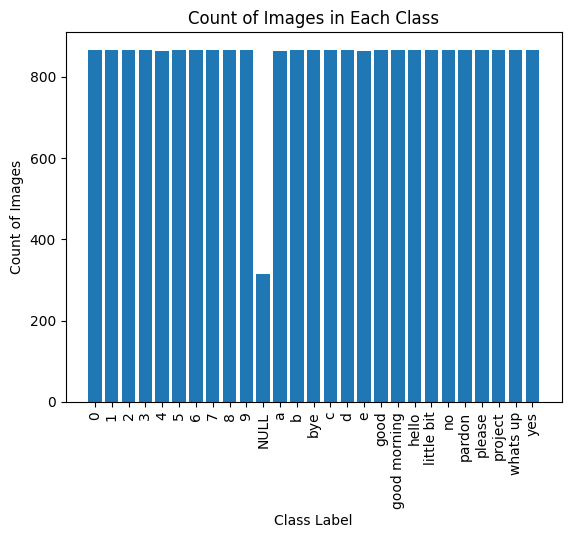

In [9]:
# Δημιουργία του bar plot
plt.bar(unique_classes, class_counts)

# Ονομασία των αξόνων και όλου του plot 
plt.xlabel('Class Label')
plt.ylabel('Count of Images')
plt.title('Count of Images in Each Class')

# Περιστροφή κάθετα του x άξονα των labels
plt.xticks(rotation='vertical')

# Εμφάνιση του plot
plt.show()

Παρατηρούμε πως περίπου ο αριθμός των εικόνων που έχουν κατανεμηθεί στις κλάσεις είναι σχεδόν ίδιος εκτός από την κλάση NULL που περιέχει τις λιγότερες με διαφορά εικόνες, όπως αναφέρθηκε και στο paper.

### Οπτικοποίηση των δεδομένων

Προκειμένου να κατανοήσουμε καλύτερα τα δεδομένα που υπάρχουν στις 27 κλάσεις, θα οπτικοποιήσουμε μια εικόνα από κάθε κλάσση. 

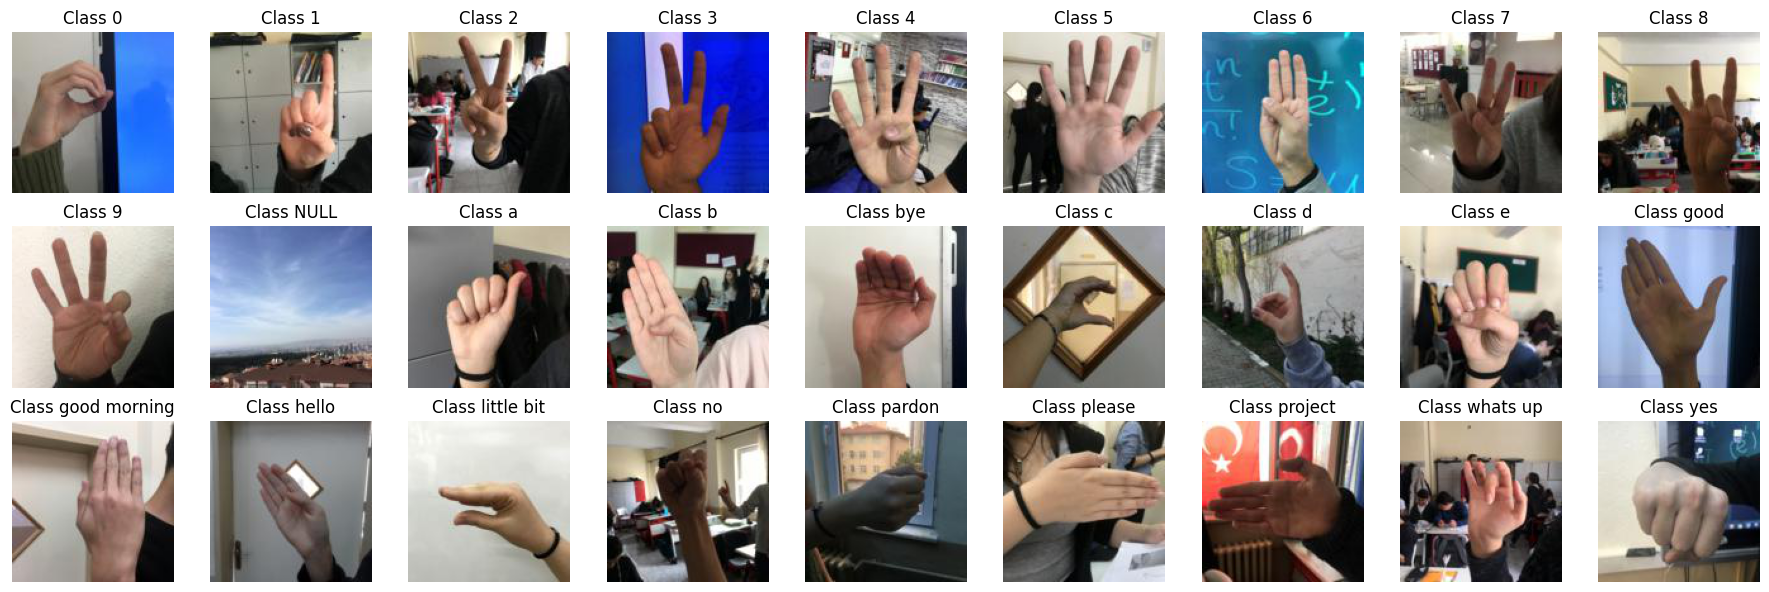

In [10]:
# Δημιουργία ενός 3x9 grid 
fig, axs = plt.subplots(3, 9, figsize=(18, 6))

# Για κάθε unique class κρατάμε το index και το label της
for i, class_label in enumerate(unique_classes):
    # Εύρεση του index από την πρώτη εικόνα που ανήκει στην τρέχουσα κλάσση 
    class_indices = np.where(label_data == class_label)[0]
    first_image_index = class_indices[0]
    
    # Παίρνουμε την πρώτη εικόνα από την κλάσση 
    image = image_data[first_image_index]
    
    # Εμφάνιση των εικόνων στο grid
    ax = axs[i // 9, i % 9] # η ακέραια διαίρεση δείχνει την γραμμή ενώ το ακέραιο υπόλοιπο δείχνει την στήλη 
    ax.imshow(image)
    
    # Απενεργοποίηση των labels από τους άξονες
    ax.axis('off')
    ax.set_title(f'Class {class_label}')
    
# Προσαρμογή των αποστάσεων μεταξύ των subplots
plt.tight_layout()
plt.show()

### Μετατροπή των labels σε labels dictionary

Στο συγκεκριμένο σημείο φτιάχνουμε το labels dictionary προκειμένου να αντιστοιχηθεί κάθε διαφορετική κλάση με έναν ακέραιο αριθμό για να μπορούμε να επεξεργαστούμε καλύτερα τις κλάσεις στη συνέχεια.

In [11]:
# Δημιουργία του labels dictionary
labels_dictionary = {class_label: i for i, class_label in enumerate(unique_classes)}
labels_dictionary

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'NULL': 10,
 'a': 11,
 'b': 12,
 'bye': 13,
 'c': 14,
 'd': 15,
 'e': 16,
 'good': 17,
 'good morning': 18,
 'hello': 19,
 'little bit': 20,
 'no': 21,
 'pardon': 22,
 'please': 23,
 'project': 24,
 'whats up': 25,
 'yes': 26}

### One-Hot-Encoding

Το One-Hot-Encoding είναι μια διαδικασία που χρησιμοποιείται για την αριθμητική αναπαράσταση κατηγορικών δεδομένων, που στην συγκεκριμένη περίπτωση είνα τα labels. Στo One-Hot-Encoding, κάθε κατηγορία σε μια κατηγορική μεταβλητή μετατρέπεται σε μια δυαδική διανυσματική αναπαράσταση. Το μήκος του δυαδικού διανύσματος είναι ίσο με τον συνολικό αριθμό των μοναδικών κατηγοριών στη μεταβλητή. Σε κάθε κατηγορία εκχωρείται ένας μοναδικός δείκτης και το δυαδικό διάνυσμα έχει τιμή 1 στη θέση που αντιστοιχεί στον δείκτη της κατηγορίας και 0 σε όλες τις άλλες θέσεις.

In [12]:
# Δημιουργία μιας mapping function χρησιμοποιώντας το labels dictionary
mapping_function = np.vectorize(lambda x: labels_dictionary[x])

# Κάνουμε map τα labels των κλάσεων σε integer τιμές χρησιμοποιώντας την mapping function
encoded_labels = mapping_function(label_data)

# Πραγματοποίηση του one-hot encoding χρησιμοποιώντας το to_categorical
one_hot_labels = to_categorical(encoded_labels)

print(one_hot_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Στον παραπάνω κώδικα, δημιουργούμε μια mapping function (συνάρτηση αντιστοίχισης) χρησιμοποιώντας τη np.vectorize() που εφαρμόζει το mapping από το labels_dictionary σε κάθε στοιχείο του πίνακα label_data.

Στη συνέχεια, χρησιμοποιούμε τη mapping function για να αντιστοιχίσουμε τις ετικέτες κλάσεων του label_data στις αντίστοιχες ακέραιες τιμές τους.

Τέλος, χρησιμοποιούμε τη συνάρτηση to_categorical από το keras.utils για να εκτελέσουμε one-hot encoding στις κωδικοποιημένες ετικέτες.

Οι προκύπτουσες one_hot_labels θα είναι ένας δυαδικός πίνακας όπου κάθε σειρά αντιστοιχεί σε ένα στιγμιότυπο και κάθε στήλη αντιπροσωπεύει μια μοναδική ετικέτα κλάσης.

## Εκπαίδευση

### Διαχωρισμός των δεδομένων

Γίνεται διαχωρισμός των δεδομένων σε train και test set. To test set αποτελεί το 20% των αρχικών δεδομένων.

In [13]:
# Διαχωρισμός των δεδομένων σε train και test set
x_train, x_test, y_train, y_test = train_test_split(image_data, one_hot_labels, test_size = 0.2, random_state = 42)

print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (18240, 128, 128, 3)
Y train shape:  (18240, 27)
X test shape:  (4561, 128, 128, 3)
Y test shape:  (4561, 27)


### Data Augmentation

Το data augmentation είναι μια τεχνική που χρησιμοποιείται συνήθως σε προβλήματα μηχανικής μάθησης για την τεχνητή αύξηση του μεγέθους ενός συνόλου δεδομένων δημιουργώντας τροποποιημένες ή συνθετικές εκδόσεις των υπαρχόντων δεδομένων. Ο στόχος είναι να βελτιωθεί η απόδοση και η ικανότητα γενίκευσης των μοντέλων μηχανικής μάθησης εκθέτοντας τα σε μια ευρύτερη ποικιλία παραδειγμάτων εκπαίδευσης.

Είναι γνωστό πως το συγκεκριμένο data set περιέχει εικόνες οι οποίες έχουν τραβηχτει σε διαφορετικά background με αποτέλεσμα να γενικεύονται τα αποτελέσματα μας και να μειώνονται οι πιθανότητες για overfitting (υπερεκπαίδευση). Για τον ίδιο σκοπό χρησιμοποιείται και το data augmentation. 
Επιπλέον, λόγω του γεγονότος πως η κλάση NULL περιλαμβάνει τις λιγότερες εικόνες σε σχέση με τις υπόλοιπες κλάσεις, με την τεχνική του data augmentation θα ενισχυθεί.

In [14]:
# Data augmentation
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(factor=0.1),
    keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.1, width_factor=0.1),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
])

Οι τεχνικές του data augmentation συνήθως περιλαμβάνουν την εφαρμογή ενός συνόλου προκαθορισμένων μετασχηματισμών ή τροποποιήσεων στα αρχικά δείγματα δεδομένων. Αυτοί οι μετασχηματισμοί εισάγουν παραλλαγές στα δεδομένα διατηρώντας τα labels ή τις σημαντικές πληροφορίες. Με αυτόν τον τρόπο, τα επαυξημένα δεδομένα μπορούν να βοηθήσουν το μοντέλο να μάθει πιο ισχυρά και αμετάβλητα χαρακτηριστικά, να μειώσει την υπερπροσαρμογή και να βελτιώσει την ικανότητά του να γενικεύει σε μη ορατά δεδομένα.

Στον παραπάνω κώδικα χρησιμοποιήθηκαν κάποιοι μετασχηματισμοί για το συγκεκριμένο πρόβλημα μέσω της βιβλιοθήκης keras. Αναλυτικά οι μετασχηματισμοί που χρησιμοποιήθηκαν ήταν οι παρακάτω.

* RandomRotation: Αυτό το augmentation layer περιστρέφει τυχαία τις εικόνες εισόδου κατά μια καθορισμένη γωνία. Σε αυτήν την περίπτωση, ο συντελεστής ορίζεται στο 0.1, πράγμα που σημαίνει ότι η γωνία περιστροφής θα επιλεγεί τυχαία μεταξύ -10% και +10% του μέγιστου εύρους περιστροφής.

* RandomZoom: Αυτό το augmentation layer μεγεθύνει τυχαία τις εικόνες εισόδου. Οι παράμετροι height_factor και width_factor ελέγχουν το κάθετο και το οριζόντιο εύρος ζουμ, αντίστοιχα. Σε αυτήν την περίπτωση, και οι δύο παράγοντες ορίζονται στο 0.1, που σημαίνει ότι οι εικόνες μπορούν να μεγεθυνθούν ή να σμικρυνθούν έως και 10% και στις δύο διαστάσεις.

* RandomFlip: Αυτό το augmentation layer αναστρέφει τυχαία τις εικόνες εισόδου οριζόντια ή κάθετα. Έχει οριστεί η παράμετρος "horizontal", πράγμα που σημαίνει ότι οι εικόνες θα αναστραφούν τυχαία οριζόντια.

Το ακολουθιακό (Sequential) μοντέλο χρησιμοποιείται για τη στοίβαξη αυτών των augmentation layers με καθορισμένη σειρά, δημιουργώντας ένα data augmentation pipeline. Όταν το pipeline εφαρμόζεται σε εικόνες εισόδου, κάθε augmentation layer θα εφαρμοστεί με τη σειρά, με αποτέλεσμα  να προκύψουν augmented εικόνες με τυχαιοποιημένους μετασχηματισμούς.

### Δημιουργία του CNN (Convolutional Neural Networks) μοντέλου

Στη συγκεκριμένη εργασία, έγινε επιλογή του CNN διότι τα μοντέλα CNN είναι ιδανικά για σύνολα δεδομένων εικόνων, καθώς αποτυπώνουν χωρικές σχέσεις και μοτίβα, εξάγοντας σημαντικά χαρακτηριστικά για εργασίες ανάλυσης εικόνας. Μαθαίνουν ιεραρχικές αναπαραστάσεις, δίνοντάς τους τη δυνατότητα να κατανοούν χαρακτηριστικά χαμηλού επιπέδου, όπως ακμές και έννοιες υψηλού επιπέδου, όπως αντικείμενα. Τα CNN εμφανίζουν μεταβλητότητα στη μετάφραση-κατανόηση, καθιστώντας τα ανθεκτικά στις παραλλαγές στη θέση των αντικειμένων μέσα στις εικόνες. Η κοινή χρήση παραμέτρων σε CNN μειώνει τη χρήση της μνήμης και διευκολύνει την αποτελεσματική εκπαίδευση σε μεγάλα σύνολα δεδομένων εικόνων.

Η παρακάτω αρχιτεκτονική υλοποιήθηκε μέσω της βιβλιοθήκης keras.

In [15]:

# Κατασκευή Ακολουθιακού Μοντέλου
cnn_model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = "relu" , input_shape = (128,128,3)),  # Ορισμός σχήματος εισόδου
    keras.layers.MaxPooling2D(pool_size=(2,2)),  #  Εφαρμογή Max-Pooling με υποδιπλασιασμό κάθε διάστασης
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"), 
    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),  # Γίνεται η έξοδος του προηγούμενου επιπέδου διάνυσμα
    keras.layers.Dense(units=256, activation="relu"),      # Προσθήκη ενός κρυφού επιπέδου 
    keras.layers.Dense(units=128, activation ="relu"),
    keras.layers.Dense(units=len(labels_dictionary), activation = "softmax") ])  # Επίπεδο εξόδου


Επεξηγηματικά, η αρχιτεκτονική που παρουσιάστηκε περιλαμβάνει:

* Το data augmentation που αναλύθηκε προηγουμένως.
* Τέσσερα Conv2D layers όπου εκτελούν 2-διάστατη συνέλιξη στα δεδομένα εισόδου. Η παράμετρος 'filters' ορίζει τον αριθμό των φίλτρων (γνωστά και ως πυρήνες ή χάρτες χαρακτηριστικών) στο επίπεδο. Κάθε φίλτρο ανιχνεύει ένα συγκεκριμένο μοτίβο ή χαρακτηριστικό στην είσοδο.  Η παράμετρος 'kernel_size=(3,3)' ορίζει το μέγεθος του συνελικτικού πυρήνα (ή φίλτρου) σε 3x3 pixel. Η παράμετρος 'activation = "relu"' καθορίζει τη λειτουργία ενεργοποίησης που θα χρησιμοποιηθεί μετά τη λειτουργία συνέλιξης. Σε αυτήν την περίπτωση, χρησιμοποιείται η ενεργοποίηση Rectified Linear Unit (ReLU), η οποία εισάγει μη γραμμικότητα στο μοντέλο. Με εξαίρεση το πρώτο Conv2D layers, η παράμετρος 'input_shape = (128,128,3)' καθορίζει το σχήμα των δεδομένων εισόδου που αναμένεται από το δίκτυο. Οι εικόνες εισόδου αναμένεται να έχουν ύψος και πλάτος 128 pixel και 3 κανάλια (RGB).
* Τέσσερα MaxPooling2D layers όπου το Max pooling είναι μια λειτουργία μείωσης δειγματοληψίας που μειώνει τις χωρικές διαστάσεις της εισόδου, διατηρώντας παράλληλα τα πιο σημαντικά χαρακτηριστικά. Η παράμετρος 'pool_size=(2,2)' ορίζει το μέγεθος του παραθύρου συγκέντρωσης (pooling) σε 2x2 pixel.
* Ένα Flatten layer που μετατρέπει την έξοδο του προηγούμενου στρώματος σε ένα διάνυσμα 1 διάστασης. Ουσιαστικά μετατρέπει τους πολυδιάστατους χάρτες χαρακτηριστικών σε ένα ενιαίο συνεχές διάνυσμα, το οποίο μπορεί να χρησιμοποιηθεί ως είσοδος σε πλήρως συνδεδεμένα επίπεδα.
* Δύο Dense layers που προσθέτουν πλήρως συνδεδεμένα (πυκνά) layers στο μοντέλο. Τα πυκνά layers χρησιμοποιούνται για την εκμάθηση πολύπλοκων μοτίβων στα δεδομένα. Η παράμετρος 'units' oρίζει τον αριθμό των νευρώνων στο layer και η παράμετρος 'activation' καθορίζει τη συνάρτηση ενεργοποίησης που θα χρησιμοποιηθεί στο επίπεδο. Η ενεργοποίηση ReLU χρησιμοποιείται για τα δύο πρώτα πυκνά στρώματα.
* Ένα Dense layer που έχει τον ρόλο του layer εξόδου. Ο αριθμός των νευρώνων ('units') σε αυτό το επίπεδο είναι ίσος με τον αριθμό των κλάσεων στο πρόβλημα ταξινόμησης (ανακτήθηκε από το len(labels_dictionary)). Η συνάρτηση ενεργοποίησης (activation) που χρησιμοποιείται είναι η softmax, η οποία παράγει μια κατανομή πιθανότητας στις κλάσεις, υποδεικνύοντας την προβλεπόμενη πιθανότητα του μοντέλου για κάθε κατηγορία.

Στη συνέχεια φαίνονται επιπρόσθετα χαρακτηριστικά του μοντέλου.

In [16]:
# Compile του cnn_model
cnn_model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

* loss='categorical_crossentropy': Η συνάρτηση loss μετρά την απόκλιση μεταξύ των προβλεπόμενων εξόδων και των πραγματικών. Σε αυτήν την περίπτωση, χρησιμοποιείται η συνάρτηση απώλειας «categorical_crossentropy», η οποία χρησιμοποιείται συνήθως για προβλήματα ταξινόμησης πολλών κατηγοριών, όπου οι ετικέτες είναι κωδικοποιημένες με ένα μόνο τρόπο.

* optimizer=keras.optimizers.Adam(learning_rate=0.001): Η παράμετρος optimizer καθορίζει τον αλγόριθμο βελτιστοποίησης που χρησιμοποιείται για την ενημέρωση των βαρών του μοντέλου με βάση τις υπολογισμένες κλίσεις. Σε αυτή την περίπτωση, χρησιμοποιείται ο optimizer Adam. Ο Adam είναι ένας αλγόριθμος βελτιστοποίησης που προσαρμόζει τον ρυθμό μάθησης κατά τη διάρκεια της εκπαίδευσης. Η παράμετρος learning_rate ορίζεται σε 0,001, η οποία καθορίζει το μέγεθος βήματος για κάθε ενημέρωση βάρους.

* metrics=['accuracy']: Η παράμετρος metrics καθορίζει τις μετρήσεις αξιολόγησης που θα υπολογιστούν κατά τη διάρκεια της εκπαίδευσης και των δοκιμών. Σε αυτήν την περίπτωση, η ακρίβεια ('accuracy') του μοντέλου χρησιμοποιείται ως μετρική αξιολόγησης. Η ακρίβεια μετρά την αναλογία των σωστά προβλεπόμενων δειγμάτων.

Ο παρακάτω κώδικας αναφέρεται σε επιπλέον ενέργειες που πρέπει να γίνουν κατά την διάρκεια της εκπαιδευση.

In [17]:
# Καθορισμός των callbacks
early_stopping = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor = 0.1, patience = 5)

Συγκεκριμένα:

* early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True): Η επανάκληση EarlyStopping χρησιμοποιείται για να σταματήσει νωρίς τη διαδικασία εκπαίδευσης εάν μια παρακολουθούμενη ποσότητα (π.χ. validation loss) σταματήσει να βελτιώνεται. Η παράμετρος 'patience = 10' καθορίζει τον αριθμό των εποχών που πρέπει να περιμένουμε πριν σταματήσει η εκπαίδευση, εάν δεν υπάρχει βελτίωση στην παρακολουθούμενη ποσότητα. Σε αυτή την περίπτωση, εάν δεν υπάρξει βελτίωση για 10 συνεχόμενες εποχές, η εκπαίδευση θα σταματήσει. Η παράμετρος 'restore_best_weights=True' καθορίζει ότι τα καλύτερα βάρη του μοντέλου θα πρέπει να αποκατασταθούν μόλις σταματήσει η εκπαίδευση. Τα καλύτερα βάρη καθορίζονται με βάση την παρακολουθούμενη ποσότητα.

* reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5): Η επανάκληση ReduceLROnPlateau χρησιμοποιείται για τη δυναμική προσαρμογή του ρυθμού εκμάθησης κατά τη διάρκεια της εκπαίδευσης. Η παράμετρος 'factor = 0.1' καθορίζει τον παράγοντα κατά τον οποίο θα μειωθεί το ποσοστό εκμάθησης. Σε αυτήν την περίπτωση, ο ρυθμός εκμάθησης θα πολλαπλασιάζεται επί 0.1 κάθε φορά που η παρακολουθούμενη ποσότητα (π.χ. validation loss) είναι χαμηλή. Η παράμετρος 'patience = 5' καθορίζει τον αριθμό των εποχών που πρέπει να περιμένουμε πριν μειωθεί ο ρυθμός εκμάθησης εάν δεν υπάρχει βελτίωση στην παρακολουθούμενη ποσότητα. Σε αυτήν την περίπτωση, εάν δεν υπάρξει βελτίωση για 5 συνεχόμενες εποχές, το ποσοστό μάθησης θα μειωθεί.

Στη συνέχεια γίνεται η εκπαίδευση του cnn_model μέσω της συνάρτησης fit(). 

Ως παράμετροι αρχικά είναι οι εικόνες και τα labels αυτών που θα χρησιμοποιηθούν για πρόβλεψη. Έπειτα, το μοντέλο έχει επιλεχθεί να εκπαιδευτεί σε 200 εποχές αλλα να σταματήσει μέσω του early stopping αν πραγματοποιηθεί η εκπαίδευση του νωρίτερα. Ακόμα, μέσω της παραμέτρου steps_per_epoch καθορίζεται ο αριθμών των βημάτων που θα επαναληφθούν σε κάθε εποχή και μέσω του validation_steps καθορίζεται ο αριθμός των βημάτων που πρέπει να επαναληφθούν στα validation data κατά την διάρκεια κάθε εποχής. Τέλος χρησιμοποιείται η μεταβλητή validation_data για την αξιολόγηση της απόδοσης του μοντέλου κατά τη διάρκεια της εκπαίδευσης.

In [18]:
# Εκπαίδευση του μοντέλου
history = cnn_model.fit(x_train, y_train, epochs = 200, steps_per_epoch=150, validation_steps=50, validation_data = (x_test, y_test), callbacks = [early_stopping, reduce_lr])

Epoch 1/200
150/150 [==============================] - 94s 604ms/step - loss: 2.9452 - accuracy: 0.1226 - val_loss: 2.1842 - val_accuracy: 0.3144 - lr: 0.0010
Epoch 2/200
150/150 [==============================] - 84s 560ms/step - loss: 1.9702 - accuracy: 0.3731 - val_loss: 1.3545 - val_accuracy: 0.5720 - lr: 0.0010
Epoch 3/200
150/150 [==============================] - 81s 542ms/step - loss: 1.4290 - accuracy: 0.5333 - val_loss: 1.0410 - val_accuracy: 0.6711 - lr: 0.0010
Epoch 4/200
150/150 [==============================] - 81s 540ms/step - loss: 1.1066 - accuracy: 0.6399 - val_loss: 0.8208 - val_accuracy: 0.7338 - lr: 0.0010
Epoch 5/200
150/150 [==============================] - 81s 542ms/step - loss: 0.9309 - accuracy: 0.6969 - val_loss: 0.7585 - val_accuracy: 0.7569 - lr: 0.0010
Epoch 6/200
150/150 [==============================] - 82s 545ms/step - loss: 0.8158 - accuracy: 0.7345 - val_loss: 0.6467 - val_accuracy: 0.7974 - lr: 0.0010
Epoch 7/200
150/150 [=========================

Η εκπαίδευση του μοντέλου φαίνεται πως πραγματοποιείται σωστά καθώς αυξάνονται οι τιμές του accuracy και val_accuracy αλλά ταυτόχρονα μειώνονται οι τiμές του loss val_loss. 

Τελικά το μοντέλο έχει trainig accuracy 96,96%. Σε αυτό το σημείο θα πρέπει να αναφερθεί πως η αρχιτεκτονική του μοντέλου επιλέχθηκε πειραματικά.

In [19]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)       

Οι παράμετροι του νευρωνικού δικτύου φαίνεται πως είναι 1,313,723.

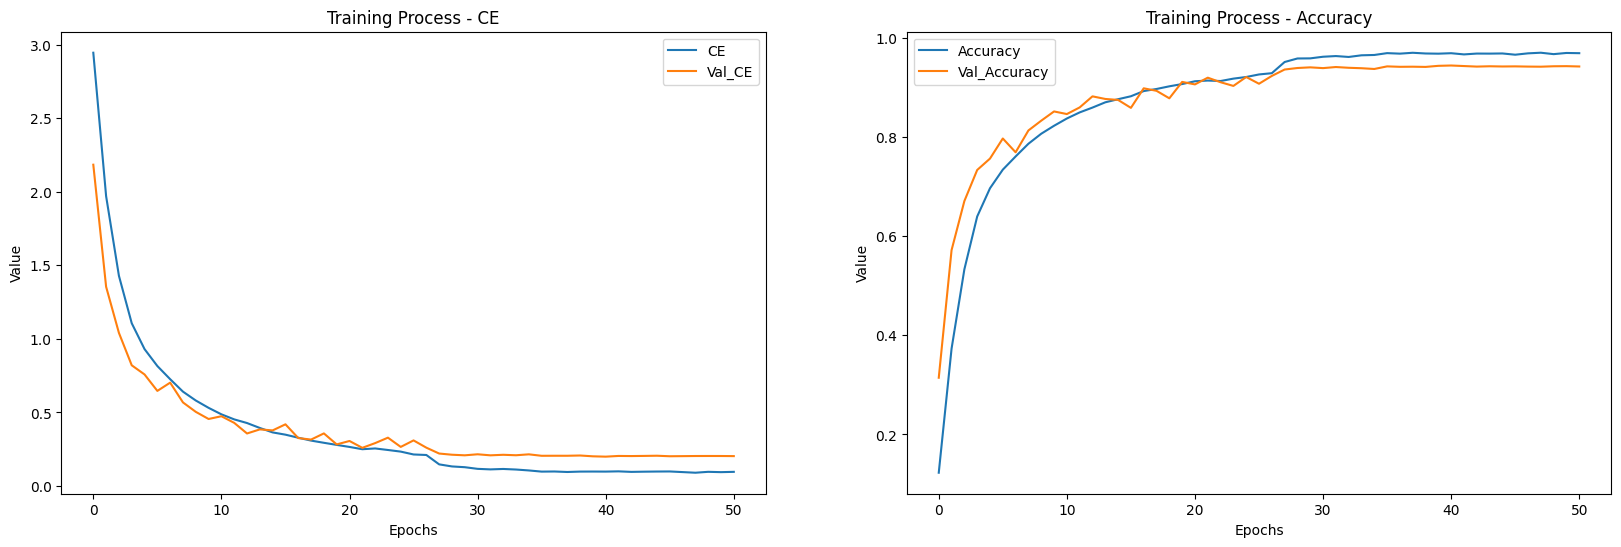

In [20]:
# Δημιουργία γραφήματος που θα έχει 2 υπογραφήματα το ένα δίπλα στο άλλο
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(20,6))

# Δημιουργία του πρώτου γραφήματος (αριστερά)
axis[0].plot(history.epoch, history.history['loss']) # δημιουργία γραφικής παράστασης Cross Entropy εκπαίδευσης
axis[0].plot(history.epoch, history.history['val_loss']) # δημιουργία γραφικής παράστασης Cross Entropy επαλήθευσης
axis[0].set_xlabel("Epochs") # ορισμός τίτλου οριζόντιου άξονα 
axis[0].set_ylabel("Value") # ορισμός τίτλου κάθετου άξονα
axis[0].legend(["CE", "Val_CE"]) # ορισμός υπομνήματος
axis[0].set_title("Training Process - CE") # ορισμός τίτλου γραφήματος

# Δημιουργία του δεύτερου γραφήματος (δεξιά) - H ίδια διαδικασία αλλα για την Ακρίβεια
axis[1].plot(history.epoch, history.history['accuracy'])
axis[1].plot(history.epoch, history.history['val_accuracy'])
axis[1].set_xlabel("Epochs") 
axis[1].set_ylabel("Value") 
axis[1].legend(["Accuracy", "Val_Accuracy"])
axis[1].set_title("Training Process - Accuracy")
plt.show()

Συμφωνα με τα παραπάνω γραφήματα το μοντέλο εκπαιδεύτηκε ικανοποιητικά χρησιμοποιώντας την απώλεια ('categorical_crossentropy') και την ακρίβεια ('accuracy').

## Αξιολόγηση επιδόσεων

### Ακρίβεια

Προκειμένου να αξιολογήσουμε αν το μοντέλο λειτουργεί και σε αλλα δεδομένα πέρα αυτών του training set, θα χρησιμοποιήσουμε τα δεδομένα του test set.

In [21]:
# Πρόβλεψη στο test set
y_pred = cnn_model.predict(x_test)

# Ανάθεση της κάθε εικόνας στην κλάση με την μεγαλύτερη πιθανότητα
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Υπολογισμός ακρίβειας
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("The Accuracy of the Neural Network on the Test Data is:", accuracy)

143/143 [==============================] - 4s 29ms/step
The Accuracy of the Neural Network on the Test Data is: 0.9447489585617189


Αποδείχθηκε πως η ακρίβεια στο test set είναι 94,47% πράγμα που σημαίνει πως το μοντέλο είναι αρκετά ικανοποιητικό. 

### Confusion Matrix

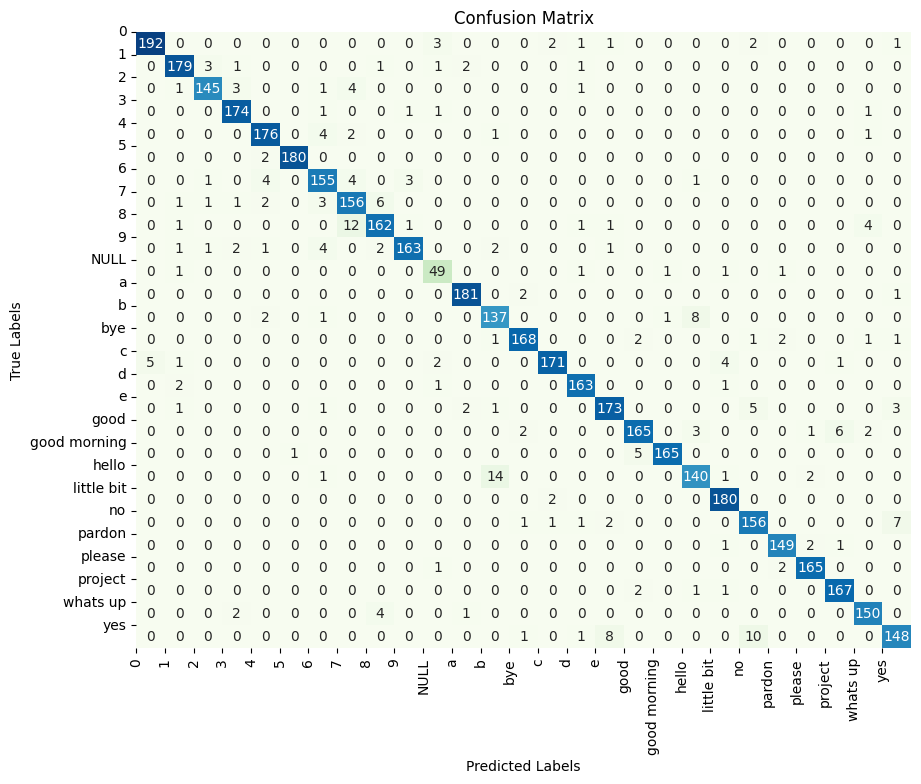

In [22]:
# Δημιουργία confusion matrix χρησιμοποιώντας τα αρχικά labels των κλάσεων
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Δημιουργία heatmap του confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', cbar=False)
plt.title('Confusion Matrix')
ticks = np.arange(len(unique_classes))
plt.xticks(ticks, unique_classes, rotation = 90)
plt.yticks(ticks, unique_classes, rotation = 0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Σύμφωνα με τον confusion matrix φαίνεται πως οι περισσότερες εικόνες έχουν ταξινομηθεί σωστά στις κλάσεις τους, άρα η ταξινόμηση είναι αρκετά ικανοποιητική. Βέβαια, διακρίνεται πως στην κλάση NULL υπάρχουν οι λιγότερες προβλέψεις λόγω του γεγονότος πως το dataset είχε τα λιγότερα δεδομένα για αυτή την κλάση.

## Βιβλιογραφία

* A New 27 Class Sign Language Dataset Collected from 173 Individuals, Arda Mavi, Zeynep Dikle, Turkey
* Εργαστηριακό μάθημα: Συνελικτικά Νευρωνικά Δίκτυα (Convolutional Neural Networks), Ιωάννης Νέλλας, Παναγιώτης Αναγνώστου, Σωτήριος Τασουλής
* Εργαστηριακό μάθημα: Νευρωνικά Δίκτυα Πολλαπλών Επιπέδων (Multilayer Neural Networks), Ιωάννης Νέλλας, Σωτήριος Τασουλής